In [42]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

In [43]:
#Criando uma lista de valores aleatórios utilizando a lib Numpy e a manipulação de listas

valores = [np.random.randint(1,200) for x in range(1000)]

#Criando outliers
outliers_1 = [np.random.randint(300,1000) for x in range(10)]
outliers_2 = [np.random.randint(-100,100) for x in range(10)]
for i in range(len(outliers_1)):
    valores.append(outliers_1[i])
    valores.append(outliers_2[i])

In [44]:
'''Calculando a mediana a partir da manipulação de listas e criando uma validação, onde se a quantidade e valores for par, considerar a
média dos valores centrais, se não, considerar o valor central'''

valores.sort()
N = len(valores)
if N%2 == 0:
    a = int((N/2)-1) #Como o índice começa no 0, substraímos 1 do índice para coletarmos o valor central
    b = int((N/2)) #Como somou com o valor seguinte, (N-1)+1 = N, sobrando somente N/2
    mediana = (valores[a] + valores[b])/2
else:
    a = int(round((N/2)-1),0)
    mediana = valores[a]


In [62]:
#Para validar a lógica feita anteriormente, importei a lib pandas e calculei a mediana a partir da biblioteca
df = pd.DataFrame(valores)
df.median()
print(' Validação '.center(100, '-'))
print(f'Mediana estimada: {df.median()[0]}\nMediana calculada: {mediana}')

-------------------------------------------- Validação ---------------------------------------------
Mediana estimada: 105.0
Mediana calculada: 105.0


In [51]:
#Calculando os Quartis
valores.sort()

Q1 = int(round((N)/4,0)) #Pela fórmula também temos N+1, mas como o índice começa em 0, ficou (N+1)-1 = N
Q3 = 3*Q1
valor_Q1 = valores[Q1]
valor_Q3 = valores[Q3]

In [52]:
# Calculando os limites para os outliers a partir dos quartis
IQR = valor_Q3 - valor_Q1
l_sup = valor_Q3 + 1.5*IQR
l_inf = valor_Q1 - 1.5*IQR

In [67]:
print(' Medidas de Posição '.center(50, '-'))
print(f'Valor da Mediana: {mediana}\nValor do primeiro Quartil: {valor_Q1}\nValor do terceiro Quartil: {valor_Q3}\nValor do Limite Superior: {l_sup}\nValor do Limite Inferior: {l_inf}')

--------------- Medidas de Posição ---------------
Valor da Mediana: 105.0
Valor do primeiro Quartil: 51
Valor do terceiro Quartil: 151
Valor do Limite Superior: 301.0
Valor do Limite Inferior: -99.0


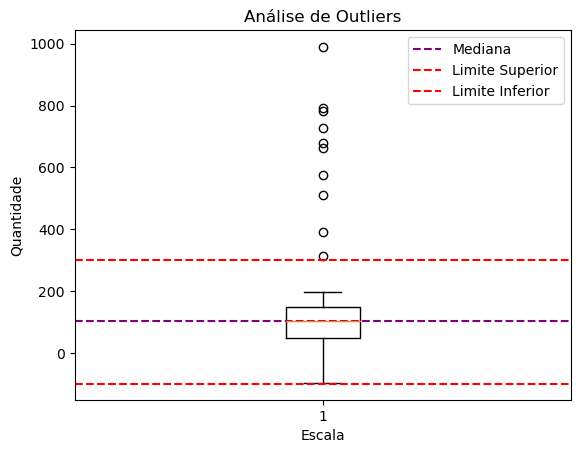

In [72]:
#Com as medidas calculadas, basta plotarmos o BoxPlot
plt.boxplot(valores)
plt.axhline(y=mediana, color='purple', linestyle='--', label='Mediana')
plt.axhline(y=l_sup, color='red', linestyle='--', label='Limite Superior')
plt.axhline(y=l_inf, color='red', linestyle='--', label='Limite Inferior')
plt.title('Análise de Outliers')
plt.xlabel('Escala')
plt.ylabel('Quantidade')
plt.legend()